In [10]:
import pandas as pd

dataframe = pd.read_csv('data/base_IledeFrance.csv')
dataframe.head()

,id,batiment_groupe_id,code_departement_insee,dpe_id,numero_dpe,avancee_masque_max,baie_fs,baie_mat,baie_orientation,baie_remplissage,...,ph_mat,ph_pos_isol,ph_type_adjacence,ph_u,presence_balcon,presence_climatisation,s_hab,type_batiment,type_ventilation,ratio_ges_conso
0,0,95018000BO0233_eb19993f70dc3f2,95,5941086,1895V2001058X,NaN,NaN,bois,NaN,air sec,...,plafond avec ou sans remplissage sous combles,ITI,NaN,NaN,NaN,False,55.0,Maison,Ventilation naturelle par conduit,0.23
1,1,95018000BR0576_6c7cc7c44855f5f,95,3900810,1695V2003777F,NaN,NaN,pvc,['nord'],NaN,...,combles aménagés sous rampant,ITI,NaN,NaN,NaN,False,65.0,Maison,NaN,0.03
2,2,95018000BS0766_7b813cd7421c4a5,95,9426192,2095N1000764K,NaN,NaN,pvc,NaN,argon ou krypton,...,dalle béton,ITI,NaN,NaN,NaN,False,65.0,Appartement,Ventilation mécanique à extraction hygroréglable,0.23
3,3,95014000AI0120_b3c49dd4d1ec084,95,880675,1495V1001815T,NaN,0.43,bois,"['nord', 'sud']",air sec,...,plafond bois sous solives bois,ITI,LNC,0.18,False,False,150.0,Maison,Ventilation mécanique auto réglable « après 19...,0.05
4,4,95018000BS1305_984545f8965ce16,95,4676937,1795V1002187@,NaN,0.44,pvc,"['ouest', 'sud']",NaN,...,combles aménagés sous rampant,ITI,EXTERIEUR,0.20,False,False,83.0,Maison,Système de ventilation par entrées d’air haute...,0.06


In [26]:
import matplotlib.pyplot as plt

def plot_nan_histogram(dfs, titles, figsize=(15, 5)):
    """
    Plot a histogram of the number of NaN values in each column of a list of dataframes.
    """
    num_plots = len(dfs)

    if num_plots != len(titles):
        raise ValueError("The number of dataframes must match the number of titles.")

    fig = plt.figure(figsize=figsize)

    for i in range(num_plots):
        nan_counts = dfs[i].isna().sum()
        nan_counts = nan_counts[nan_counts > 0]
        
        plt.subplot(1, num_plots, i + 1)
        if nan_counts.empty:
            plt.text(0.5, 0.5, "No NaN values found in any column.", ha='center', va='center')
            plt.axis('off')
        else:
            nan_counts.plot(kind='bar', color='y')
            plt.title(f'Number of NaNs per Column ({titles[i]})')
            plt.xlabel('Columns')
            plt.ylabel('Number of NaNs')
            plt.xticks(rotation=45, ha='right') 

    plt.tight_layout()
    plt.show()

def plot_unique_values_histogram(df, columns):
    """
    Plot a histogram of the number of unique values in each column of a dataframe.
    """
    unique_counts = {col: df[col].nunique() for col in columns}
    fig = plt.figure(figsize=(10, 5))
    plt.bar(unique_counts.keys(), unique_counts.values(), color='skyblue')
    plt.xlabel('Columns')
    plt.ylabel('Number of Unique Values')
    plt.title('Unique Values in Each Column')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

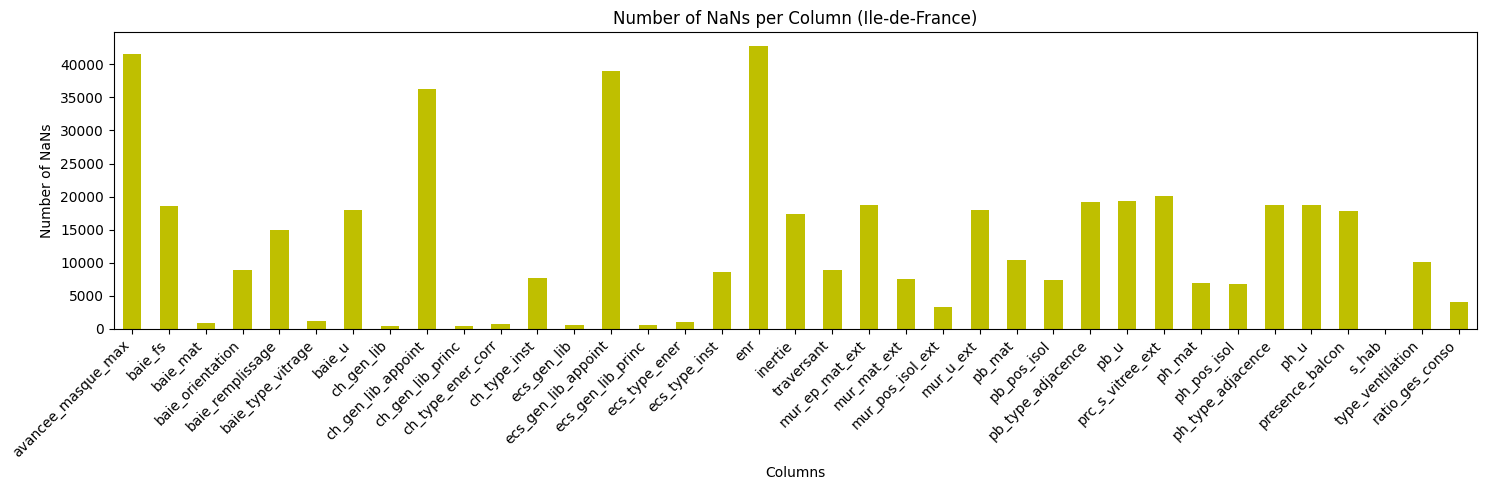

In [12]:
plot_nan_histogram([dataframe], ['Ile-de-France'])

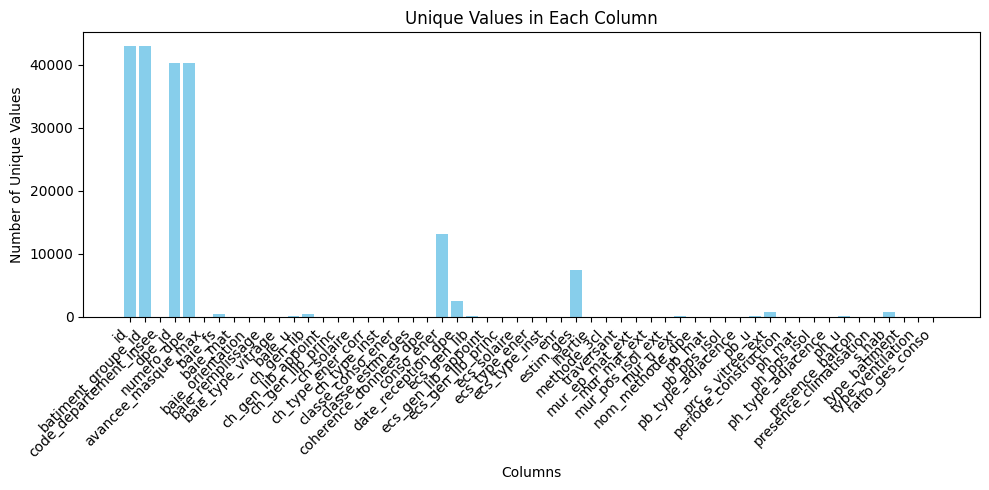

In [27]:
plot_unique_values_histogram(dataframe, dataframe.columns)

In [21]:
useless_columns = [ 'id', #unique
                    'batiment_groupe_id', #unique
                    'code_departement_insee', #ile de france
                    'dpe_id', #unique
                    'numero_dpe', #unique
                    'date_reception_dpe', #pas pertinent
                    'avancee_masque_max', #null
                    'ecs_gen_lib_appoint', #null
                    'ch_gen_lib_appoint', #null
                    'enr' #null
                ]

In [22]:
dataframe_dropped = dataframe.drop(columns=useless_columns)
dataframe_dropped.head()

,baie_fs,baie_mat,baie_orientation,baie_remplissage,baie_type_vitrage,baie_u,ch_gen_lib,ch_gen_lib_princ,ch_solaire,ch_type_ener_corr,...,periode_construction,ph_mat,ph_pos_isol,ph_type_adjacence,ph_u,presence_balcon,presence_climatisation,s_hab,type_ventilation,ratio_ges_conso
0,NaN,bois,NaN,air sec,double vitrage,NaN,['chaudiere gaz standard'],chaudiere gaz standard,False,gaz,...,<1948,plafond avec ou sans remplissage sous combles,ITI,NaN,NaN,NaN,False,55.0,Ventilation naturelle par conduit,0.23
1,NaN,pvc,['nord'],NaN,double vitrage,NaN,['radiateurs electriques'],generateurs a effet joule,False,electricite,...,<1948,combles aménagés sous rampant,ITI,NaN,NaN,NaN,False,65.0,NaN,0.03
2,NaN,pvc,NaN,argon ou krypton,double vitrage,NaN,['chaudiere gaz condensation'],chaudiere gaz condensation,False,gaz,...,>2012,dalle béton,ITI,NaN,NaN,NaN,False,65.0,Ventilation mécanique à extraction hygroréglable,0.23
3,0.43,bois,"['nord', 'sud']",air sec,double vitrage,2.6,"['convecteurs electriques nfc', 'poele ou inse...",generateurs a effet joule,False,bois + electricite,...,1989-1999,plafond bois sous solives bois,ITI,LNC,0.18,False,False,150.0,Ventilation mécanique auto réglable « après 19...,0.05
4,0.44,pvc,"['ouest', 'sud']",NaN,double vitrage,2.1,['convecteurs electriques nfc'],generateurs a effet joule,False,electricite,...,<1948,combles aménagés sous rampant,ITI,EXTERIEUR,0.20,False,False,83.0,Système de ventilation par entrées d’air haute...,0.06


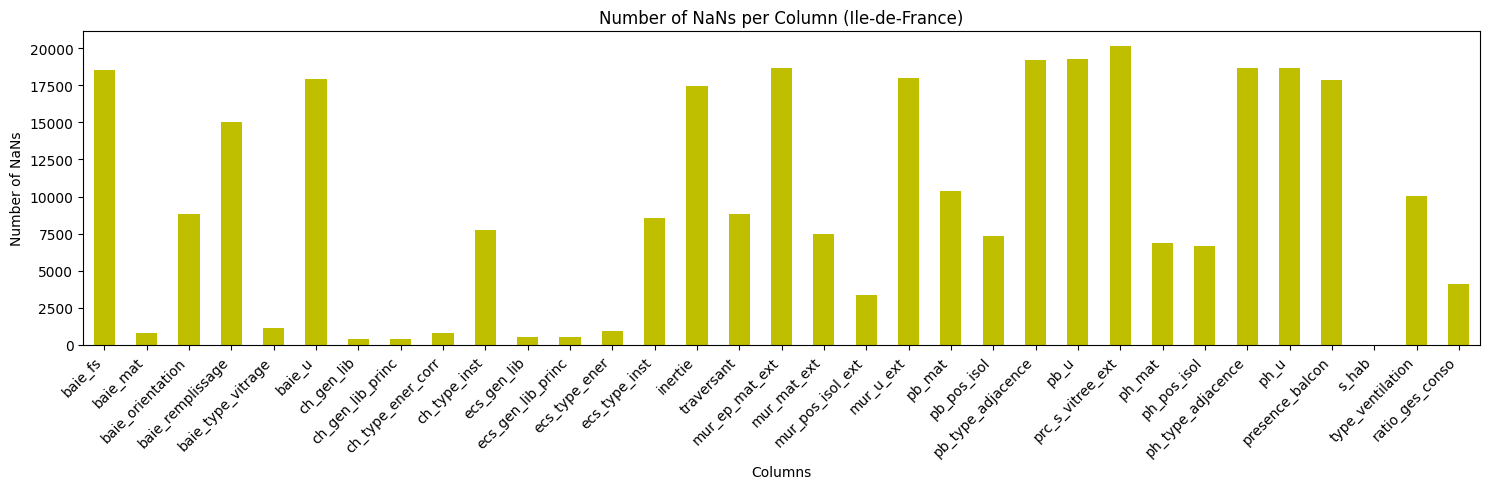

In [24]:
plot_nan_histogram([dataframe_dropped], ['Ile-de-France'])

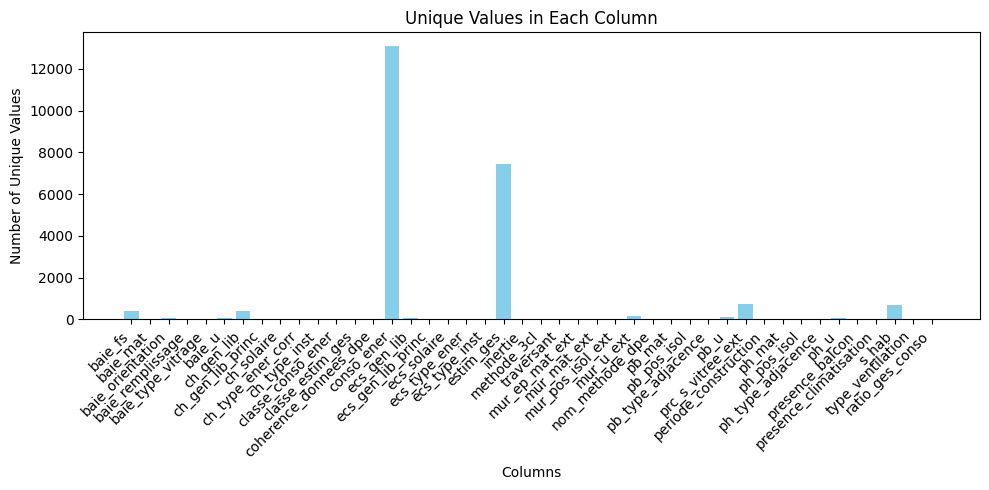

In [28]:
plot_unique_values_histogram(dataframe_dropped, dataframe_dropped.columns)